### Data Anaysis

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import datetime as dt
import re

In [188]:
df = pd.read_json(r"C:\Users\Ertuğrul\Downloads\updated_dataset.json", lines=True)
df.sample(30)

,time,remote_ip,remote_user,request,response,bytes,referrer,agent
29234,27/May/2015:12:05:12 +0000,54.209.92.192,-,GET /downloads/gislaved-ultra-speed-2-215-55-r...,404,336,-,Debian APT-HTTP/1.3 (1.0.1ubuntu2)
50145,03/Jun/2015:20:06:08 +0000,103.234.145.253,-,GET /downloads/michelin-alpin-5-rft-n0-205-55-...,404,337,-,Debian APT-HTTP/1.3 (0.9.9.1~ubuntu1)
3806,18/May/2015:15:05:38 +0000,74.125.60.158,-,GET /downloads/michelin-alpin-5-zp-n0-295-45-r...,404,336,-,Debian APT-HTTP/1.3 (1.0.1ubuntu2)
45671,02/Jun/2015:06:06:36 +0000,74.125.60.158,-,GET /downloads/hankook-kinergy-eco2-k435-185-6...,404,345,-,Debian APT-HTTP/1.3 (1.0.1ubuntu2)
9036,20/May/2015:11:05:32 +0000,180.179.174.219,-,GET /downloads/kumho-ecsta-ps71-215-45-zr18-93...,304,0,-,Debian APT-HTTP/1.3 (0.9.7.9)
28871,27/May/2015:09:05:35 +0000,148.251.195.19,-,GET /downloads/hankook-kinergy-4s-h740-275-45-...,304,0,-,Debian APT-HTTP/1.3 (1.0.1ubuntu2)
48771,03/Jun/2015:08:06:27 +0000,192.73.248.229,-,GET /downloads/bridgestone-turanza-er300-205-5...,404,336,-,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)
12080,21/May/2015:13:05:20 +0000,74.63.142.188,-,GET /downloads/gislaved-ultra-speed-2-215-55-r...,404,319,-,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.16)
38531,30/May/2015:18:05:40 +0000,193.234.243.70,-,GET /downloads/gislaved-ultra-speed-2-215-55-r...,304,0,-,Debian APT-HTTP/1.3 (1.0.1ubuntu2)
33346,28/May/2015:22:05:57 +0000,193.234.241.71,-,GET /downloads/bridgestone-turanza-er300-205-5...,404,336,-,Debian APT-HTTP/1.3 (1.0.1ubuntu2)


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51462 entries, 0 to 51461
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   time         51462 non-null  object
 1   remote_ip    51462 non-null  object
 2   remote_user  51462 non-null  object
 3   request      51462 non-null  object
 4   response     51462 non-null  int64 
 5   bytes        51462 non-null  int64 
 6   referrer     51462 non-null  object
 7   agent        51462 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.1+ MB


In [190]:
df['time'] = pd.to_datetime(df['time'], format='%d/%b/%Y:%H:%M:%S %z')

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51462 entries, 0 to 51461
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   time         51462 non-null  datetime64[ns, UTC]
 1   remote_ip    51462 non-null  object             
 2   remote_user  51462 non-null  object             
 3   request      51462 non-null  object             
 4   response     51462 non-null  int64              
 5   bytes        51462 non-null  int64              
 6   referrer     51462 non-null  object             
 7   agent        51462 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 3.1+ MB


In [192]:
#df_to_excel = df.copy()
#df_to_excel

In [193]:
##df_to_excel['time'] = df_to_excel['time'].apply(lambda d: pd.to_datetime(d).date())  # remove time
##df_to_excel
#
#df_to_excel['time'] = df_to_excel['time'].dt.tz_localize(None)  # remove only timezone
#df_to_excel

In [194]:
#df_to_excel.to_excel(r"C:\Users\Ertuğrul\Downloads\updated_dataset.xlsx", index=False)

In [195]:
df["time"].dt.year.head(5)

0    2015
1    2015
2    2015
3    2015
4    2015
Name: time, dtype: int64

In [196]:
df["time"].dt.month.head(5)

0    5
1    5
2    5
3    5
4    5
Name: time, dtype: int64

In [197]:
df["time"].dt.day.head(5)

0    17
1    17
2    17
3    17
4    17
Name: time, dtype: int64

In [198]:
df["time"].dt.hour.head(5)

0    8
1    8
2    8
3    8
4    8
Name: time, dtype: int64

In [199]:
df["time"].dt.minute.head(5)

0    5
1    5
2    5
3    5
4    5
Name: time, dtype: int64

In [200]:
df['time'] = df['time'].dt.tz_localize(None)  # remove timezone
df["year"] = df["time"].dt.year
df["month"] = df["time"].dt.month
df["day"] = df["time"].dt.day
df["hour"] = df["time"].dt.hour
df["minute"] = df["time"].dt.minute

In [201]:
df

,time,remote_ip,remote_user,request,response,bytes,referrer,agent,year,month,day,hour,minute
0,2015-05-17 08:05:32,93.180.71.3,-,GET /downloads/gislaved-ultra-speed-2-215-55-r...,304,0,-,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21),2015,5,17,8,5
1,2015-05-17 08:05:23,93.180.71.3,-,GET /downloads/bridgestone-turanza-er300-275-4...,304,0,-,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21),2015,5,17,8,5
2,2015-05-17 08:05:24,80.91.33.133,-,GET /downloads/kumho-ecsta-ps71-215-45-zr18-93...,304,0,-,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.17),2015,5,17,8,5
3,2015-05-17 08:05:34,217.168.17.5,-,GET /downloads/bridgestone-turanza-er300-rft-2...,200,490,-,Debian APT-HTTP/1.3 (0.8.10.3),2015,5,17,8,5
4,2015-05-17 08:05:09,217.168.17.5,-,GET /downloads/pirelli-scorpion-sealinside-ao-...,200,490,-,Debian APT-HTTP/1.3 (0.8.10.3),2015,5,17,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51457,2015-06-04 07:06:04,173.255.199.22,-,GET /downloads/kumho-ecsta-ps71-215-45-zr18-93...,404,339,-,Debian APT-HTTP/1.3 (0.8.10.3),2015,6,4,7,6
51458,2015-06-04 07:06:05,54.186.10.255,-,GET /downloads/michelin-alpin-5-zp-n0-225-45-r...,200,2582,-,urlgrabber/3.9.1 yum/3.4.3,2015,6,4,7,6
51459,2015-06-04 07:06:16,80.91.33.133,-,GET /downloads/pirelli-scorpion-sealinside-ao-...,304,0,-,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.16),2015,6,4,7,6
51460,2015-06-04 07:06:05,144.76.151.58,-,GET /downloads/kumho-ecsta-ps71-215-45-zr18-93...,304,0,-,Debian APT-HTTP/1.3 (0.9.7.9),2015,6,4,7,6


In [202]:
df.drop(["remote_user","referrer"], axis=1, inplace=True)
df

,time,remote_ip,request,response,bytes,agent,year,month,day,hour,minute
0,2015-05-17 08:05:32,93.180.71.3,GET /downloads/gislaved-ultra-speed-2-215-55-r...,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21),2015,5,17,8,5
1,2015-05-17 08:05:23,93.180.71.3,GET /downloads/bridgestone-turanza-er300-275-4...,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21),2015,5,17,8,5
2,2015-05-17 08:05:24,80.91.33.133,GET /downloads/kumho-ecsta-ps71-215-45-zr18-93...,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.17),2015,5,17,8,5
3,2015-05-17 08:05:34,217.168.17.5,GET /downloads/bridgestone-turanza-er300-rft-2...,200,490,Debian APT-HTTP/1.3 (0.8.10.3),2015,5,17,8,5
4,2015-05-17 08:05:09,217.168.17.5,GET /downloads/pirelli-scorpion-sealinside-ao-...,200,490,Debian APT-HTTP/1.3 (0.8.10.3),2015,5,17,8,5
...,...,...,...,...,...,...,...,...,...,...,...
51457,2015-06-04 07:06:04,173.255.199.22,GET /downloads/kumho-ecsta-ps71-215-45-zr18-93...,404,339,Debian APT-HTTP/1.3 (0.8.10.3),2015,6,4,7,6
51458,2015-06-04 07:06:05,54.186.10.255,GET /downloads/michelin-alpin-5-zp-n0-225-45-r...,200,2582,urlgrabber/3.9.1 yum/3.4.3,2015,6,4,7,6
51459,2015-06-04 07:06:16,80.91.33.133,GET /downloads/pirelli-scorpion-sealinside-ao-...,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.16),2015,6,4,7,6
51460,2015-06-04 07:06:05,144.76.151.58,GET /downloads/kumho-ecsta-ps71-215-45-zr18-93...,304,0,Debian APT-HTTP/1.3 (0.9.7.9),2015,6,4,7,6


In [203]:
def http_request_type(request_string):
    pattern = r"^(\w+)\s"
    match = re.match(pattern, request_string)
    result = match.group(1)
    return result

In [204]:
def product_extract(request_string):
    pattern = r"\w+\s/downloads/(.*?)\sHTTP"
    #result = re.findall(pattern, request_string)
    match = re.match(pattern, request_string)
    result = match.group(1)    
    return result

In [205]:
def brand_extract(request_string):
    pattern = r"\w+\s/downloads/(\w+)-(.*?)\sHTTP"
    #result = re.findall(pattern, request_string)
    match = re.match(pattern, request_string)
    result = match.group(1)    
    return result

In [206]:
def model_extract(request_string):
    pattern = r"\w+\s/downloads/(\w+)-(.*?)\sHTTP"
    #result = re.findall(pattern, request_string)
    match = re.match(pattern, request_string)
    result = match.group(2)    
    return result

In [207]:
def product_year_extract(request_string):
    pattern = r"\w+\s/downloads/(\w+)-(.*?)-?(\d{4})?\sHTTP"
    #result = re.findall(pattern, request_string)
    match = re.match(pattern, request_string)
    result = match.group(3)
    if result:
        result = result
    else:
        result = "Empty"    
    return result

In [208]:
df["request_type"] = df["request"].apply(lambda x: http_request_type(x))
df["product"] = df["request"].apply(lambda x: product_extract(x))
df["product_brand"] = df["request"].apply(lambda x: brand_extract(x))
df["product_model"] = df["request"].apply(lambda x: model_extract(x))
df["product_year"] = df["request"].apply(lambda x: product_year_extract(x))
df

,time,remote_ip,request,response,bytes,agent,year,month,day,hour,minute,request_type,product,product_brand,product_model,product_year
0,2015-05-17 08:05:32,93.180.71.3,GET /downloads/gislaved-ultra-speed-2-215-55-r...,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21),2015,5,17,8,5,GET,gislaved-ultra-speed-2-215-55-r17-98w-xl-2023,gislaved,ultra-speed-2-215-55-r17-98w-xl-2023,2023
1,2015-05-17 08:05:23,93.180.71.3,GET /downloads/bridgestone-turanza-er300-275-4...,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21),2015,5,17,8,5,GET,bridgestone-turanza-er300-275-45-r19-109w-2023,bridgestone,turanza-er300-275-45-r19-109w-2023,2023
2,2015-05-17 08:05:24,80.91.33.133,GET /downloads/kumho-ecsta-ps71-215-45-zr18-93...,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.17),2015,5,17,8,5,GET,kumho-ecsta-ps71-215-45-zr18-93y-xl-2022,kumho,ecsta-ps71-215-45-zr18-93y-xl-2022,2022
3,2015-05-17 08:05:34,217.168.17.5,GET /downloads/bridgestone-turanza-er300-rft-2...,200,490,Debian APT-HTTP/1.3 (0.8.10.3),2015,5,17,8,5,GET,bridgestone-turanza-er300-rft-205-55-r16-91w-2023,bridgestone,turanza-er300-rft-205-55-r16-91w-2023,2023
4,2015-05-17 08:05:09,217.168.17.5,GET /downloads/pirelli-scorpion-sealinside-ao-...,200,490,Debian APT-HTTP/1.3 (0.8.10.3),2015,5,17,8,5,GET,pirelli-scorpion-sealinside-ao-235-45-r21-101t...,pirelli,scorpion-sealinside-ao-235-45-r21-101t-xl-elec...,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51457,2015-06-04 07:06:04,173.255.199.22,GET /downloads/kumho-ecsta-ps71-215-45-zr18-93...,404,339,Debian APT-HTTP/1.3 (0.8.10.3),2015,6,4,7,6,GET,kumho-ecsta-ps71-215-45-zr18-93y-xl-2022,kumho,ecsta-ps71-215-45-zr18-93y-xl-2022,2022
51458,2015-06-04 07:06:05,54.186.10.255,GET /downloads/michelin-alpin-5-zp-n0-225-45-r...,200,2582,urlgrabber/3.9.1 yum/3.4.3,2015,6,4,7,6,GET,michelin-alpin-5-zp-n0-225-45-r17-91v-xl-2023,michelin,alpin-5-zp-n0-225-45-r17-91v-xl-2023,2023
51459,2015-06-04 07:06:16,80.91.33.133,GET /downloads/pirelli-scorpion-sealinside-ao-...,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.16),2015,6,4,7,6,GET,pirelli-scorpion-sealinside-ao-235-45-r21-101t...,pirelli,scorpion-sealinside-ao-235-45-r21-101t-xl-elec...,2022
51460,2015-06-04 07:06:05,144.76.151.58,GET /downloads/kumho-ecsta-ps71-215-45-zr18-93...,304,0,Debian APT-HTTP/1.3 (0.9.7.9),2015,6,4,7,6,GET,kumho-ecsta-ps71-215-45-zr18-93y-xl-2022,kumho,ecsta-ps71-215-45-zr18-93y-xl-2022,2022


In [209]:
df.columns

Index(['time', 'remote_ip', 'request', 'response', 'bytes', 'agent', 'year',
       'month', 'day', 'hour', 'minute', 'request_type', 'product',
       'product_brand', 'product_model', 'product_year'],
      dtype='object')

In [210]:
df1 = df[["time","year","month","day","hour","minute","remote_ip","request_type","product","product_brand","product_model","product_year","response","bytes","agent"]]
df2 = df[["time","remote_ip","request_type","product_brand","product_model","product_year","response","bytes","agent"]]

In [211]:
df1

,time,year,month,day,hour,minute,remote_ip,request_type,product,product_brand,product_model,product_year,response,bytes,agent
0,2015-05-17 08:05:32,2015,5,17,8,5,93.180.71.3,GET,gislaved-ultra-speed-2-215-55-r17-98w-xl-2023,gislaved,ultra-speed-2-215-55-r17-98w-xl-2023,2023,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)
1,2015-05-17 08:05:23,2015,5,17,8,5,93.180.71.3,GET,bridgestone-turanza-er300-275-45-r19-109w-2023,bridgestone,turanza-er300-275-45-r19-109w-2023,2023,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)
2,2015-05-17 08:05:24,2015,5,17,8,5,80.91.33.133,GET,kumho-ecsta-ps71-215-45-zr18-93y-xl-2022,kumho,ecsta-ps71-215-45-zr18-93y-xl-2022,2022,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.17)
3,2015-05-17 08:05:34,2015,5,17,8,5,217.168.17.5,GET,bridgestone-turanza-er300-rft-205-55-r16-91w-2023,bridgestone,turanza-er300-rft-205-55-r16-91w-2023,2023,200,490,Debian APT-HTTP/1.3 (0.8.10.3)
4,2015-05-17 08:05:09,2015,5,17,8,5,217.168.17.5,GET,pirelli-scorpion-sealinside-ao-235-45-r21-101t...,pirelli,scorpion-sealinside-ao-235-45-r21-101t-xl-elec...,2022,200,490,Debian APT-HTTP/1.3 (0.8.10.3)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51457,2015-06-04 07:06:04,2015,6,4,7,6,173.255.199.22,GET,kumho-ecsta-ps71-215-45-zr18-93y-xl-2022,kumho,ecsta-ps71-215-45-zr18-93y-xl-2022,2022,404,339,Debian APT-HTTP/1.3 (0.8.10.3)
51458,2015-06-04 07:06:05,2015,6,4,7,6,54.186.10.255,GET,michelin-alpin-5-zp-n0-225-45-r17-91v-xl-2023,michelin,alpin-5-zp-n0-225-45-r17-91v-xl-2023,2023,200,2582,urlgrabber/3.9.1 yum/3.4.3
51459,2015-06-04 07:06:16,2015,6,4,7,6,80.91.33.133,GET,pirelli-scorpion-sealinside-ao-235-45-r21-101t...,pirelli,scorpion-sealinside-ao-235-45-r21-101t-xl-elec...,2022,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.16)
51460,2015-06-04 07:06:05,2015,6,4,7,6,144.76.151.58,GET,kumho-ecsta-ps71-215-45-zr18-93y-xl-2022,kumho,ecsta-ps71-215-45-zr18-93y-xl-2022,2022,304,0,Debian APT-HTTP/1.3 (0.9.7.9)


In [212]:
df2

,time,remote_ip,request_type,product_brand,product_model,product_year,response,bytes,agent
0,2015-05-17 08:05:32,93.180.71.3,GET,gislaved,ultra-speed-2-215-55-r17-98w-xl-2023,2023,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)
1,2015-05-17 08:05:23,93.180.71.3,GET,bridgestone,turanza-er300-275-45-r19-109w-2023,2023,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)
2,2015-05-17 08:05:24,80.91.33.133,GET,kumho,ecsta-ps71-215-45-zr18-93y-xl-2022,2022,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.17)
3,2015-05-17 08:05:34,217.168.17.5,GET,bridgestone,turanza-er300-rft-205-55-r16-91w-2023,2023,200,490,Debian APT-HTTP/1.3 (0.8.10.3)
4,2015-05-17 08:05:09,217.168.17.5,GET,pirelli,scorpion-sealinside-ao-235-45-r21-101t-xl-elec...,2022,200,490,Debian APT-HTTP/1.3 (0.8.10.3)
...,...,...,...,...,...,...,...,...,...
51457,2015-06-04 07:06:04,173.255.199.22,GET,kumho,ecsta-ps71-215-45-zr18-93y-xl-2022,2022,404,339,Debian APT-HTTP/1.3 (0.8.10.3)
51458,2015-06-04 07:06:05,54.186.10.255,GET,michelin,alpin-5-zp-n0-225-45-r17-91v-xl-2023,2023,200,2582,urlgrabber/3.9.1 yum/3.4.3
51459,2015-06-04 07:06:16,80.91.33.133,GET,pirelli,scorpion-sealinside-ao-235-45-r21-101t-xl-elec...,2022,304,0,Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.16)
51460,2015-06-04 07:06:05,144.76.151.58,GET,kumho,ecsta-ps71-215-45-zr18-93y-xl-2022,2022,304,0,Debian APT-HTTP/1.3 (0.9.7.9)


In [89]:
df["request"].apply(lambda x: product_year_extract(x))

0        2023
1        2023
2        2022
3        2023
4        2022
         ... 
51457    2022
51458    2023
51459    2022
51460    2022
51461    2023
Name: request, Length: 51462, dtype: object

In [ ]:
r"^(\w+)\s"

In [ ]:
r"\w+\s(/downloads/.*?)\sHTTP"

In [ ]:
r"\w+\s/downloads/(.*?)\sHTTP"

In [ ]:
r"\w+\s/downloads/(\w+)-(.*?)\sHTTP"

In [86]:
text = "GET /downloads/gislaved-ultra-speed-2-215-55-r17-98w-xl HTTP/1.1"

In [87]:
pattern = r"\w+\s/downloads/(\w+)-(.*?)-?(\d{4})?\sHTTP"
#result = re.findall(pattern, request_string)
match = re.match(pattern, text)
result = match.group(3)
if result:
    print(result)
else:
    print("None") 

None


In [83]:
print(type(result))

<class 'str'>


In [8]:
df.iloc[0,0]

Timestamp('2015-05-17 08:05:32+0000', tz='UTC')

In [9]:
df["referrer"].value_counts()

-                                                             51449
http://www.elasticsearch.org/overview/elkdownloads/               6
http://logstash.net/                                              2
http://logstash.net/docs/1.3.3/                                   1
http://www.elasticsearch.org/downloads/1-3-5/                     1
http://www.elasticsearch.org/downloads/1-4-1/                     1
http://www.elasticsearch.org/overview/kibana/installation/        1
http://www.logstash.net/                                          1
Name: referrer, dtype: int64

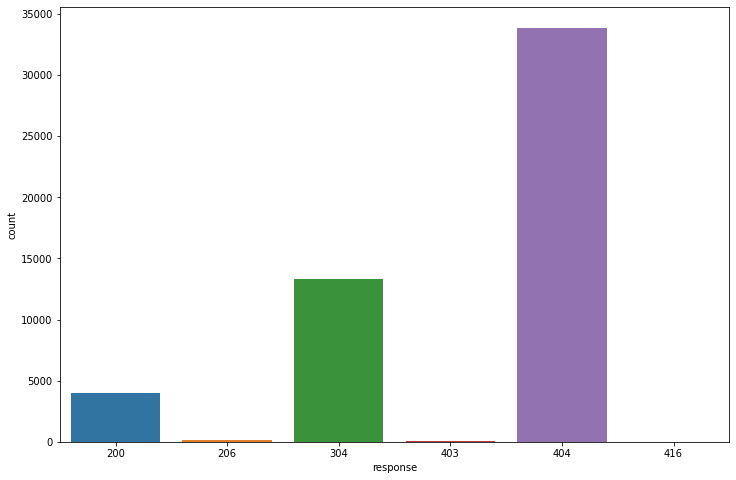

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(x="response",data=df);

In [ ]:
import pandas as pd

# Örnek veri
date_string = "17/May/2015:08:05:32 +0000"

# Tarih ve saat formatını belirtin
datetime_format = "%d/%b/%Y:%H:%M:%S %z"

# datetime formatına dönüştürün
datetime_obj = pd.to_datetime(date_string, format=datetime_format)

print(datetime_obj)

In [ ]:
from dateutil import parser
import datetime
# Tail from actual nginx access.log
from sys import stdin
        
#lines = [
#  '93.180.71.3 - - [17/May/2015:08:05:32 +0000] "GET /downloads/product_1 HTTP/1.1" 502 0 "-" "Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)',
#  '93.180.71.3 - - [17/May/2015:08:05:23 +0000] "GET /downloads/product_1 HTTP/1.1" 304 0 "-" "Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)',
#  '80.91.33.133 - - [17/May/2015:08:05:24 +0000] "GET /downloads/product_1 HTTP/1.1" 502 0 "-" "Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.17)',
#  '217.168.17.5 - - [17/May/2015:08:05:34 +0000] "GET /downloads/product_1 HTTP/1.1" 200 490 "-" "Debian APT-HTTP/1.3 (0.8.10.3)',
#  '217.168.17.5 - - [17/May/2015:08:40:09 +0000] "GET /downloads/product_2 HTTP/1.1" 500 490 "-" "Debian APT-HTTP/1.3 (0.8.10.3)' 
#]

lines = [
  '93.180.71.3 - - [17/May/2015:08:05:32 +0000] "GET /downloads/gislaved-ultra-speed-2-215-55-r17-98w-xl-2023 HTTP/1.1" 304 0 "-" "Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)',
  '93.180.71.3 - - [17/May/2015:08:05:23 +0000] "request": "GET /downloads/bridgestone-turanza-er300-275-45-r19-109w-2023 HTTP/1.1" 304 0 "-" "Debian APT-HTTP/1.3 (0.8.16~exp12ubuntu10.21)' 
]

class NginxParser(object):

    MIN = 20
    MAX_NUMBER_OF_ERRORS = 1

    def __init__(self):
        self.status = {}
        self.first_error_time = None
    
    def parse_nginx_log(self, line):

        parts = line.split()
        return_code = parts[8]
        time_stamp = parts[3].replace("[", "")
        date_time = parser.parse(time_stamp, fuzzy=True)

        if return_code.startswith("5"):

          if '500_error' not in self.status:
            self.status['500_error'] = 1
            self.first_error_time = date_time
          else:
            self.status['500_error'] +=1
            if self.status['500_error'] >= self.MAX_NUMBER_OF_ERRORS:
                if date_time - self.first_error_time > datetime.timedelta(minutes=self.MIN):
                  print(self.status)
                  self.status.pop('500_error', None)

    def read_nginx_log(self):
        # can be made to read from sys.stdin
        for line in lines:
           self.parse_nginx_log(line)

if __name__ == '__main__':
    parse = NginxParser()
    parse.read_nginx_log()